In [76]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
df = pd.read_csv('2019.csv')
df.shape

(156, 9)

In [77]:
df.head(10)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
5,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343
6,7,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373
7,8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380
8,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308
9,10,Austria,7.246,1.376,1.475,1.016,0.532,0.244,0.226


**1. Problem statements. 
Load the data (It should have at least 100 rows.) and get familiar with it. Describe the data source and include its link. 5 points**

This dataset called 'World Happiness Report' rates the happiness of the citizens of different countries based on six categories, including life expectancy, freedom to make life choices and generosity. This particular set is the report for the year of 2019 for 156 countries. 
Link: https://www.kaggle.com/datasets/unsdsn/world-happiness?select=2019.csv

**List out three questions you want to investigate from this dataset. These questions could be a trend, a comparison between different groups of a categorical feature, a relationship between two variables, or a distribution of a numerical variable.  5 points**

1. Which top 5 countries have the highest score for generosity? Create a bar chart for this.
2. What is the average life expectancy for all countries evaluated?
3. How many countries have a GDP between 0.5 and 1.0? Which countries? List these countries from least Happiness Score to greatest. 

**2. Data cleaning.**

**Follow the data cleaning steps to clean the data. a. Drop any unwanted features if necessary. b. Address any missing values. c. Remove duplicates if necessary. d. Check the data type of each column. e. For categorical variables, check if there are any inconsistent inputs. d. For numeric variables, check any outliers.  20 points**

**a. Drop any unwanted features if necessary**

In [78]:
#no null present
df.isnull().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

In [79]:
remove = ['Perceptions of corruption']
new_df = df.drop(remove, inplace=False, axis=1)
new_df.columns.tolist()

['Overall rank',
 'Country or region',
 'Score',
 'GDP per capita',
 'Social support',
 'Healthy life expectancy',
 'Freedom to make life choices',
 'Generosity']

**b. Address any missing values**

In [80]:
#no missing values found - same no. of rows
new_df.columns.dropna()
new_df.shape

(156, 8)

**c. Remove duplicates if necessary**

In [81]:
new_df_nodups = new_df.drop_duplicates()
new_df_nodups.shape
#no duplicates found

(156, 8)

**d. Check the data type of each column**

In [82]:
new_df_nodups.dtypes

Overall rank                      int64
Country or region                object
Score                           float64
GDP per capita                  float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
dtype: object

**e. For categorical variables, check if there are any inconsistent inputs**

In [83]:
#what are 'inconsistent inputs'?

**f. For numeric variables, check any outliers**

In [84]:
new_df_no_outlier = new_df_nodups[new_df_nodups['Score']>4.000]
new_df_no_outlier.shape

(140, 8)

<AxesSubplot:>

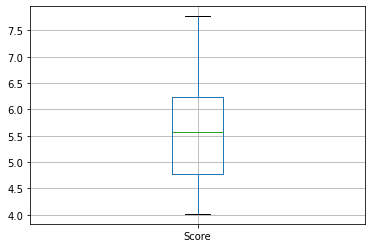

In [85]:
new_df_no_outlier.boxplot(column=['Score'])

**3. Exploratory data Analysis and Interpretation of the results.** 
**Question A:  20 points for each question
Process the data. Generate the result you want.
Create a graph to visualize the result. 
Interpret the result. Explain your findings.**

**a. Process the data. Generate the result you want.**

1. Which top 5 countries have the highest score for generosity? Create a bar chart for this.
2. What is the average life expectancy for all countries evaluated?
3. How many countries have a GDP between 0.5 and 1.0? Which countries? List these countries from least Happiness Score to greatest. 

In [86]:
#1. Which top 5 countries have the highest score for generosity?
top_five = df.nlargest(5, 'Generosity')
top_five

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
130,131,Myanmar,4.360,0.710,1.181,0.555,0.525,0.566,0.172
91,92,Indonesia,5.192,0.931,1.203,0.660,0.491,0.498,0.028
146,147,Haiti,3.597,0.323,0.688,0.449,0.026,0.419,0.110
21,22,Malta,6.726,1.300,1.520,0.999,0.564,0.375,0.151
120,121,Kenya,4.509,0.512,0.983,0.581,0.431,0.372,0.053


<function matplotlib.pyplot.show(close=None, block=None)>

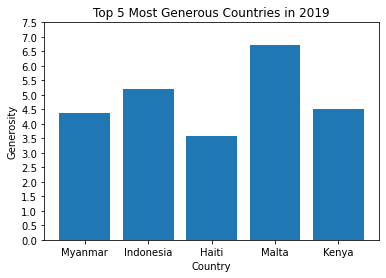

In [87]:
plt.bar(top_five.iloc[:,1], top_five.iloc[:,2])
plt.xlabel('Country')
plt.ylabel('Generosity')
plt.title('Top 5 Most Generous Countries in 2019')
plt.yticks(np.arange(0,8,0.5))

plt.show

In [88]:
# Which are the bottom 5 countries for generosity?
lowest_5 = df.nsmallest(5, 'Generosity')
lowest_5

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
81,82,Greece,5.287,1.181,1.156,0.999,0.067,0.000,0.034
147,148,Botswana,3.488,1.041,1.145,0.538,0.455,0.025,0.100
89,90,Azerbaijan,5.208,1.043,1.147,0.769,0.351,0.035,0.182
88,89,Morocco,5.208,0.801,0.782,0.782,0.418,0.036,0.076
41,42,Lithuania,6.149,1.238,1.515,0.818,0.291,0.043,0.042


<function matplotlib.pyplot.show(close=None, block=None)>

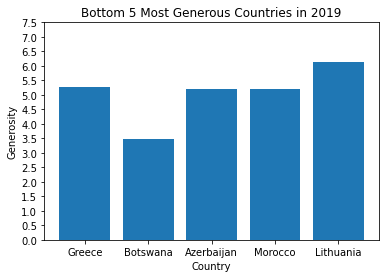

In [89]:
plt.bar(lowest_5.iloc[:,1], lowest_5.iloc[:,2])
plt.xlabel('Country')
plt.ylabel('Generosity')
plt.title('Bottom 5 Most Generous Countries in 2019')
plt.yticks(np.arange(0,8,0.5))

plt.show

Overall, it appears that the top 5 *most* generous countries are Myanmar, Indonesia, Haiti, Malta and Kenya, while the 5 *least* generous countries are Greece, Botswana, Azerbaijan, Morocco and Lithuania.

For the top 5 most generous countries, Haiti and Malta appear to be outliers, with Haiti being the lowest and Malta being the highest. This means that overall, Malta is the most generous country out of the 156 evaluated countries in the dataset.

For the 5 least generous countries, Botswana and Lithuania are outliers, with Botswana being the least generous country and Lithuania being more generous that the other 4. Overall, this lands Botswana being the lest generous country out of the 156 evaluated countries in the dataset. 

Let's try out correlations for the next question!

In [100]:
#2. What is the average life expectancy for all countries evaluated?
life = df['Healthy life expectancy']
avg_life = life.mean()
avg_life

0.7252435897435898

For all countries evaluated, there is a 0.725 value for Healthy life expectancy. 

ask about the value/units for the numbers in the dataset..

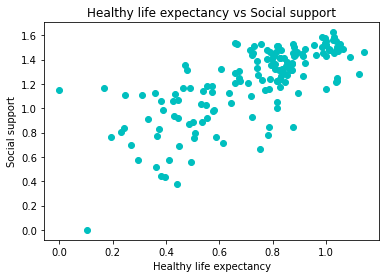

In [109]:
#let's see if there is a correlation between Healthy life expectancy and Social support
df_life = df['Healthy life expectancy']
df_social = df['Social support']

x = df_life.values
plt.xlabel('Healthy life expectancy')
y = df_social.values
plt.ylabel('Social support')
plt.title('Healthy life expectancy vs Social support')
#each dot represents a country

plt.scatter(x, y, marker='o', color='c')
plt.show()

reference: https://www.khanacademy.org/math/ap-statistics/bivariate-data-ap/scatterplots-correlation/a/describing-scatterplots-form-direction-strength-outliers

This scatterplot evaluates Healthy life expectancy vs social support to see if this dataset shows a correlation between these two categories. The goal is to evaluate if social support may be a factor in determining healthy life expectancy for this dataset. 

By the scatterplot produced, there shows to be a strong, positive linear correlation between social support and healthy life expectancy, with outliers occurring where there is a relatively high social support and low healthy life expectancy, as well as low social support and high healthy life expectancy.

In [121]:
#3. How many countries have a GDP between 0.5 and 1.0?
#Which countries? 
#List these countries from least Happiness Score to greatest.
gdp_between = df.loc[(df['GDP per capita']>= 0.5)&(df['GDP per capita']<=1.0)]
len(gdp_between.index)

51

In [122]:
#51 countries have a GDP between 0.5 and 1.0. These countries are:
gdp_between['Country or region'].tolist()

['Guatemala',
 'El Salvador',
 'Uzbekistan',
 'Colombia',
 'Nicaragua',
 'Kosovo',
 'Ecuador',
 'Jamaica',
 'Honduras',
 'Bolivia',
 'Paraguay',
 'Peru',
 'Pakistan',
 'Philippines',
 'Moldova',
 'Bosnia and Herzegovina',
 'Mongolia',
 'North Macedonia',
 'Nigeria',
 'Kyrgyzstan',
 'Morocco',
 'Lebanon',
 'Indonesia',
 'Vietnam',
 'Bhutan',
 'Cameroon',
 'Ghana',
 'Ivory Coast',
 'Jordan',
 'Congo (Brazzaville)',
 'Laos',
 'South Africa',
 'Albania',
 'Venezuela',
 'Cambodia',
 'Palestinian Territories',
 'Namibia',
 'Armenia',
 'Georgia',
 'Kenya',
 'Mauritania',
 'Tunisia',
 'Bangladesh',
 'Sri Lanka',
 'Myanmar',
 'Ukraine',
 'Swaziland',
 'Egypt',
 'Zambia',
 'India',
 'Syria']

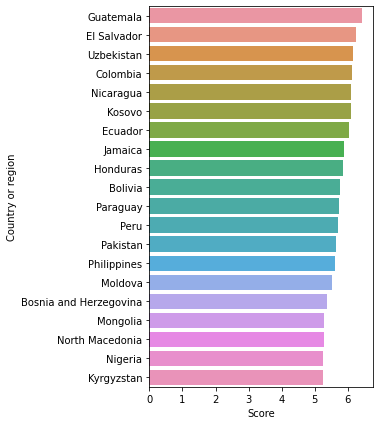

In [136]:
import seaborn as sns
plt.figure(figsize=(4, 7))
first_20 = gdp_between.head(20)
sns.barplot(data=first_20, y = 'Country or region', x = 'Score')
plt.show()

Overall, it appears that countries with higher happiness scores also rank high for social support, though these countries aren't exactly the most generous due to this. The most generous countries actually ranked quite low for happiness, with Myanmar being the lowest in this category, scoring 131 out of 156 for happiness, though the social support ranked well above the average, scoring 1.181 and having an average healthy life expectancy. 

Another top 5 generous country, Haiti, score exceptionally low across all categories, coming in at 147 out of 156. Interestingly, one of the *least* generous countries, Bostwana, ranked right after Haiti in happiness, scoring 148. 

There also appears to be a correlation between healthy life expectancy and social support, with an increasing healthy life expectancy following high social support scores, regardless of other factors evaluated. 

Lastly, about one-third of the dataset's countries has a GDP between 0.5 and 1.0, with Kenya and Myanmar being two of the top 5 most generous countries included in this category as well. Surprisingly, none of the least generous countries were included in this category. With some of the countries in this category having had humanitarian issues broadcasted within the last two decades, one may be curious about if these issues have affected their GDP. 

From this report, what was unknown was the exact units used for each category, with each column value being represented by a float. Investigating the data source did not clear up any confusion or point toward an idea of the units used. Another unknown was the exact method used to calculate this overall Happiness Score - some countries shown to have correlations that drew from the score to high scores in other categories, while some countries had mismatching numbers in terms of their overall score and that of their other columns. It is unclear what exactly the score represents. 